# Assignment #3 - Neural Networks

<font color="blue"><b> Abdullah Al Raqibul Islam </b></font>

# INDEX

I. Overview<br/>
II. Data<br/>
&emsp;&emsp;II.I. Introduction of Regression Data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.I. Reading the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.II. Preprocessing of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.I.IV. Preliminary observation<br/>
&emsp;&emsp;II.II. Introduction of Classification Data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.I. Reading the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.II. Preprocessing of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.III. Visualization of the data<br/>
&emsp;&emsp;&emsp;&emsp;II.II.IV. Preliminary observation<br/>
&emsp;&emsp;&emsp;&emsp;II.II.V. Preprocessing for Classification<br/>
III. Methods<br/>
&emsp;&emsp;III.I 5-fold Cross Validation<br/>
&emsp;&emsp;III.II Nonlinear Regression<br/>
&emsp;&emsp;III.III Nonlinear Logistic Regression<br/>
IV. Results<br/>
V. Conclusions<br/>
VI.  References<br/>
VII. Extra Credit<br/>

# I. Overview

The objective of the assignment is to understand Neural Networks and thier internal stucture. For the purpose of experimentation, a sample neural network class (class name: `NeuralNet`) has been provided alongside this assignment. We are asked to apply the neural network for the classififcation and regression data. In doing this, I first ingested one regrassion data [[1]](https://www.kaggle.com/harlfoxem/housesalesprediction) into the NeuralNet. Then I extended the given `NeuralNet` clsss and prepare it for doing classification and pass one classification data [[2]](https://www.kaggle.com/lodetomasi1995/income-classification) to it.

Neural networks are the computational models inspired by the brain. Mimicing the neurons' synaptic connecions (Figure 1), we build multiple neuron-like hidden units to map data into nonlinear space for rich representation.

<img src="https://upload.wikimedia.org/wikipedia/commons/1/10/Blausen_0657_MultipolarNeuron.png" width=500/>
<center>Figure 1. Anatomy of a neuron (wikipedia) </center>

Finally I explored one very powerful technique in Machine Learning and Statistical Analysis named Cross Validation. Particularly, I do extensive experimentation on neural network using cross validation in finding best parameters for Neural Network. In this assignment, I explored cross validation only for finding the hidden layer units. Thus covering one of the main purposes of cross validation.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #1 (of course for regression). 

## II.I. Introduction of Regression Data

This dataset [[1]](https://www.kaggle.com/harlfoxem/housesalesprediction) contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. The dataset have 21613 rows and 21 attributes. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   id (int64)
 1.   date (object)
 2.   price (float64)
 3.   bedrooms (int64)
 4.   bathrooms (float64)
 5.   sqft_living (int64)
 6.   sqft_lot (int64)
 7.   floors (float64)
 8.   waterfront (int64)
 9.   view (int64)
 10.  condition (int64)
 11.  grade (int64)
 12.  sqft_above (int64)
 13.  sqft_basement (int64)
 14.  yr_built (int64)
 15.  yr_renovated (int64)
 16.  zipcode (int64)
 17.  lat (float64)
 18.  long (float64)
 19.  sqft_living15 (int64)
 20.  sqft_lot15 (int64)

### II.I.I. Reading the data

In [291]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_r = pd.read_csv("data/regression/kc_house_data.csv")

# displaying all the columns data of top 5 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_r.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### II.I.II. Preprocessing of the data

In [292]:
# get the metadata; getting familiarized with columns and data-types
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

From the "Non-Null Count" column above, we can observe all the rows contain same number of `non-null` counts. From this count we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [293]:
# checking columns with null values
df_r.isna().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

In [294]:
# observe pairwise correlation of columns using library function
df_r.corr(method='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Non-numeric data type columns from the dataframe is ignored (i.e. "date" column in this case).

This correlation matrix gives the measure of the strength of the association between the two columns. I used Pearson's Correlation Coefficient method to generate this matrix.

### II.I.III. Visualization of the data

#### II.I.III.I. Correlation Heatmap
Corelation heatmap is provided bellow. Here I am listing my observations from the correlation heatmap:
1. The most correlated attributes with `price` are
    * bathrooms
    * sqft_living
    * view
    * grade
    * sqft_above
    * sqft_living15
2. Among them all, `sqft_living` and `grade` have the highest correlation coefficient (`0.7`).
3. This actually makes sense, as this data is suitable for `regrassion analysis` and house price mostly depends on the `size` and `quality`.

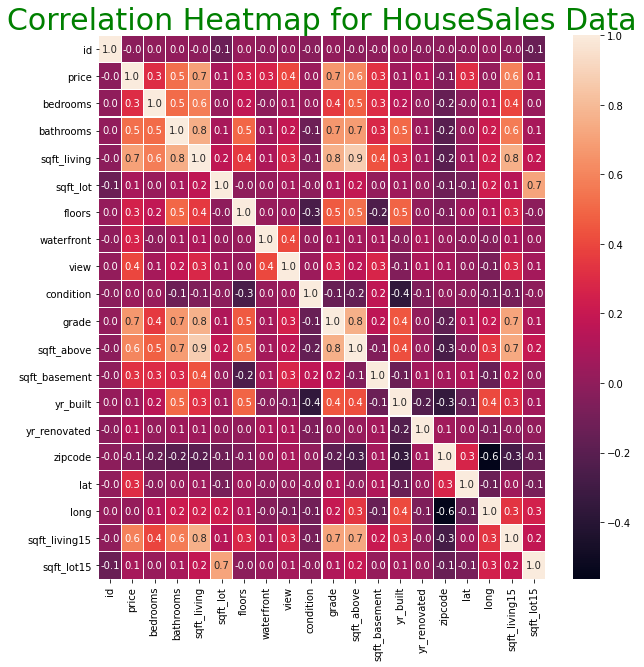

In [295]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_r.corr(method='pearson'), annot=True, linewidths=.1,fmt= '.1f')
plt.title("Correlation Heatmap for HouseSales Data", color = 'green', fontsize = 30)
plt.show()

#### II.I.III.II. Pie-chart

[1, 2, 3, 4, 5]
[30, 172, 14031, 5679, 1701]


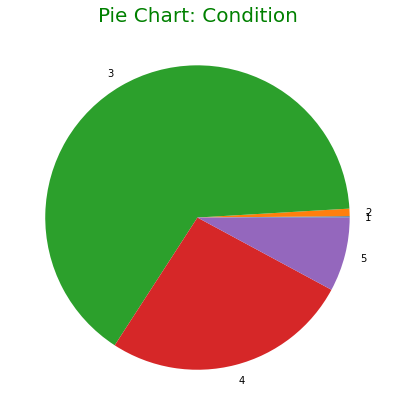

In [296]:
# Plot number of records in the dataset for different condition

conditionList = []
conditionCount = []
for condition_name, subset in df_r.groupby('condition'):
    conditionList.append(condition_name)
    conditionCount.append(len(subset))
print(conditionList)
print(conditionCount)

plt.figure(figsize = (7, 7))
plt.pie(conditionCount, labels = conditionList)
plt.title("Pie Chart: Condition", color = 'green', fontsize = 20)
plt.show()

#### II.I.III.III. Count Plots

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count Plot: # of bathrooms')

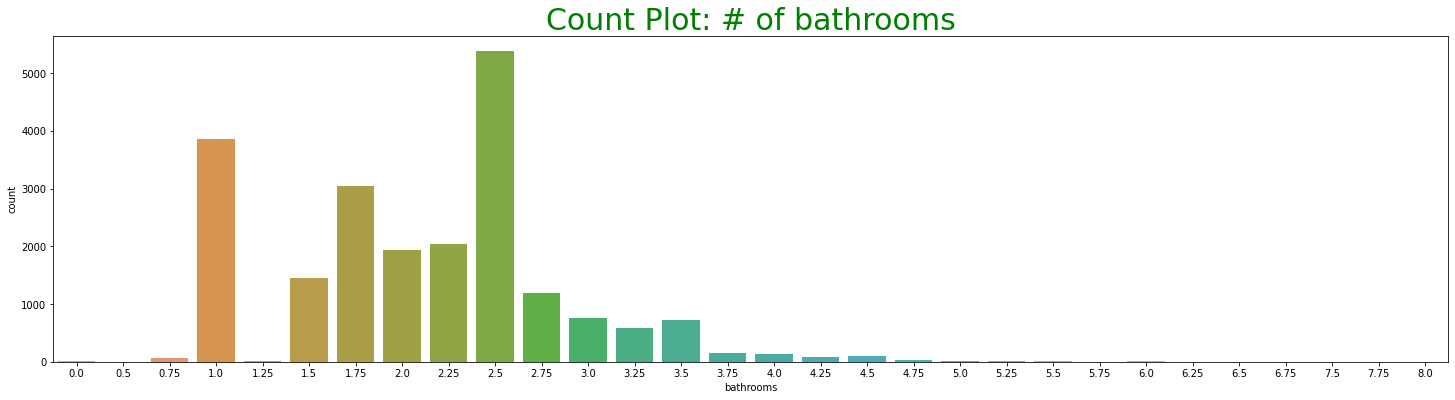

In [297]:
fig, ax = plt.subplots(figsize=(25,6))
sns.countplot(df_r.bathrooms)
plt.title("Count Plot: # of bathrooms", color = 'green', fontsize = 30)

<AxesSubplot:xlabel='zipcode', ylabel='count'>

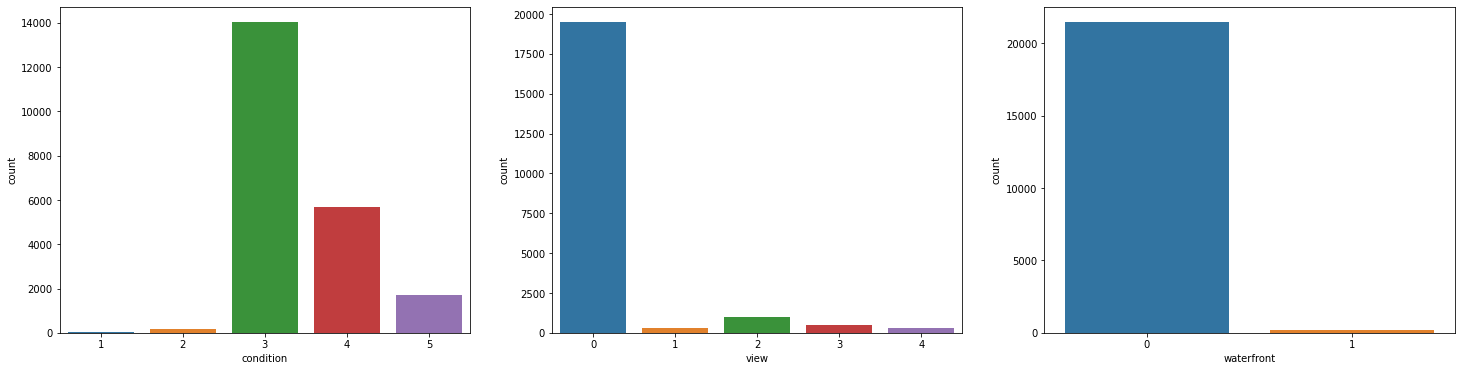

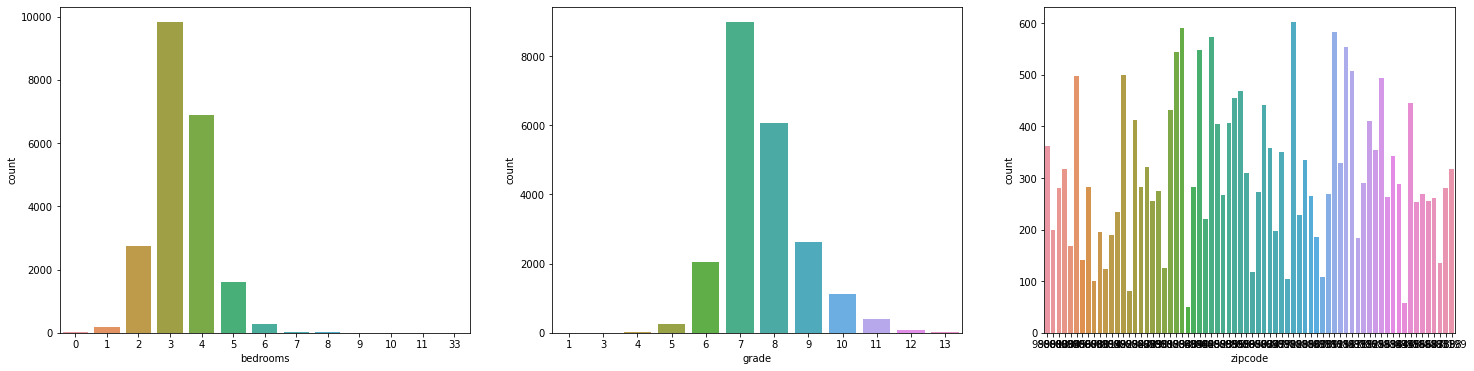

In [298]:
# Plot number of records in the dataset for different condition, view, waterfront, bedrooms, grade, zipcode

f, axes = plt.subplots(1, 3,figsize=(25,6))
sns.countplot(x= "condition", data=df_r, orient='v', ax=axes[0])
sns.countplot(x= "view", data=df_r, orient='v', ax=axes[1])
sns.countplot(x= "waterfront", data=df_r, orient='v', ax=axes[2])

f, axes = plt.subplots(1, 3,figsize=(25,6))
sns.countplot(x= "bedrooms", data=df_r, orient='v', ax=axes[0])
sns.countplot(x= "grade", data=df_r, orient='v', ax=axes[1])
sns.countplot(x= "zipcode", data=df_r, orient='v', ax=axes[2])

#### Observation:

1. The `pie-chart` and `count-plot` is used to compare parts to the whole. It helps picturing which types of data exist more in the dataset and can influence making any decision.
2. From the pie-chart we can observe that people buy more `condition 3` type house.
3. From the count-plot we can make simillar type of observations like we made in the pie-chart. That is majority people likes house with `2.5 bathrooms`.
4. Similarly, the group count-plot shows the prefered values for `condition`, `view`, `waterfront`, `bedrooms`, `grade`, and `zipcode`.

#### II.I.III.IV. Line Plots

Text(0.5, 1.0, 'Line Plot: Price Vs. Size')

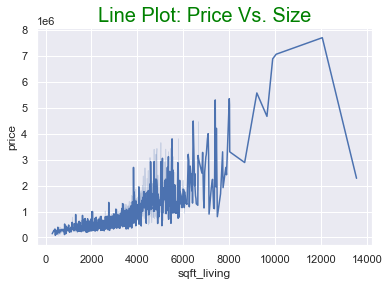

In [299]:
# Plot the prices based on size

sns.set_theme(style="darkgrid")
sns.lineplot(x="sqft_living", y="price", data=df_r)
plt.title("Line Plot: Price Vs. Size", color = 'green', fontsize = 20)

#### II.I.III.V. Linear Regression Plots

Text(0.5, 1.0, 'Linear Regression Plot: Price Vs. Size')

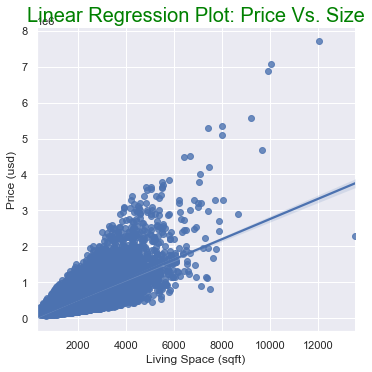

In [300]:
# Plot linear regression on price based on size

g = sns.lmplot(data=df_r, x="sqft_living", y="price")
g.set_axis_labels("Living Space (sqft)", "Price (usd)")
plt.title("Linear Regression Plot: Price Vs. Size", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Linear Regression Plot: Price Vs. Size_15')

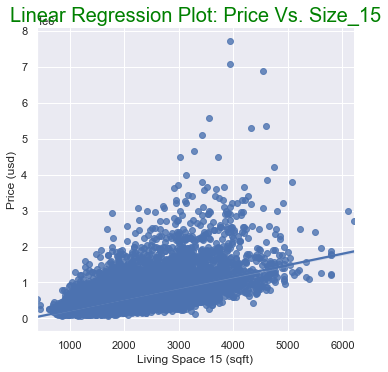

In [301]:
# Plot linear regression on price based on size15

g = sns.lmplot(data=df_r, x="sqft_living15", y="price")
g.set_axis_labels("Living Space 15 (sqft)", "Price (usd)")
plt.title("Linear Regression Plot: Price Vs. Size_15", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Linear Regression Plot: Price Vs. Size_above')

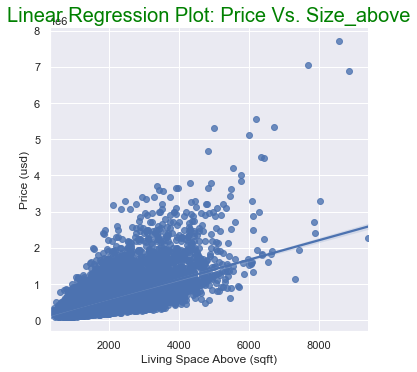

In [302]:
# Plot linear regression on price based on size_above

g = sns.lmplot(data=df_r, x="sqft_above", y="price")
g.set_axis_labels("Living Space Above (sqft)", "Price (usd)")
plt.title("Linear Regression Plot: Price Vs. Size_above", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: Price Vs. Size (w.r.t # of bedrooms)')

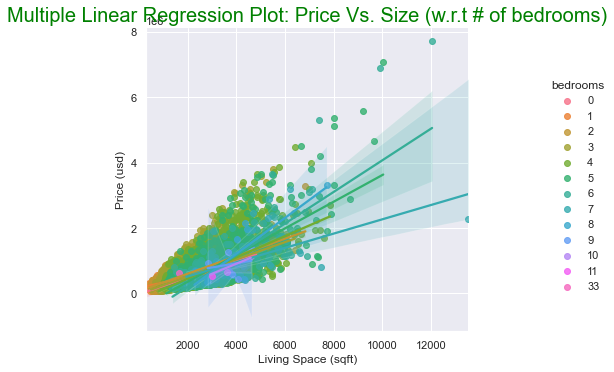

In [303]:
# Plot multiple linear regression on price based on size varying number of bedrooms

g = sns.lmplot(data=df_r, x="sqft_living", y="price", hue="bedrooms")
g.set_axis_labels("Living Space (sqft)", "Price (usd)")
plt.title("Multiple Linear Regression Plot: Price Vs. Size (w.r.t # of bedrooms)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: Price Vs. Size (w.r.t waterfront)')

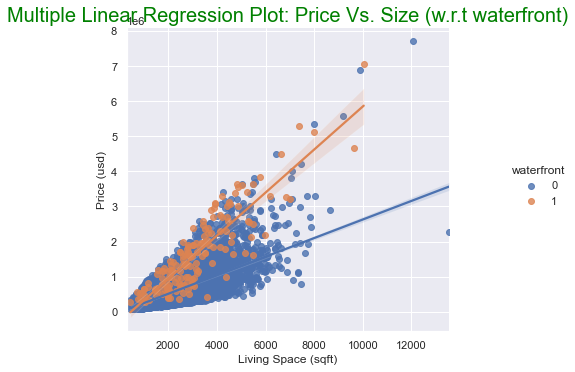

In [304]:
# Plot multiple linear regression on price based on size varying waterfront

g = sns.lmplot(data=df_r, x="sqft_living", y="price", hue="waterfront")
g.set_axis_labels("Living Space (sqft)", "Price (usd)")
plt.title("Multiple Linear Regression Plot: Price Vs. Size (w.r.t waterfront)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: Price Vs. Size (w.r.t waterfront)')

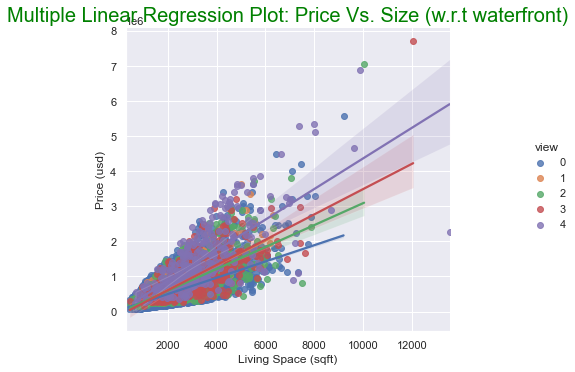

In [305]:
# Plot multiple linear regression on price based on size varying view

g = sns.lmplot(data=df_r, x="sqft_living", y="price", hue="view")
g.set_axis_labels("Living Space (sqft)", "Price (usd)")
plt.title("Multiple Linear Regression Plot: Price Vs. Size (w.r.t waterfront)", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Multiple Linear Regression Plot: Price Vs. Size (w.r.t condition)')

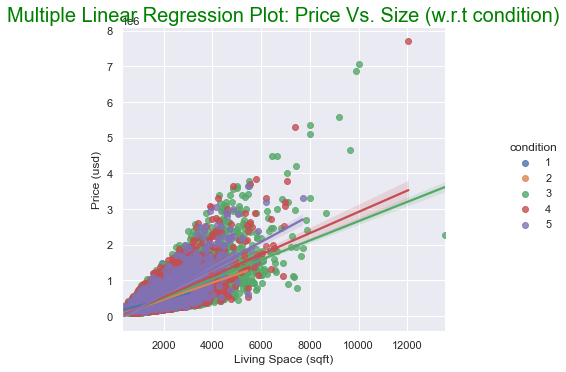

In [306]:
# Plot multiple linear regression on price based on size varying condition

g = sns.lmplot(data=df_r, x="sqft_living", y="price", hue="condition")
g.set_axis_labels("Living Space (sqft)", "Price (usd)")
plt.title("Multiple Linear Regression Plot: Price Vs. Size (w.r.t condition)", color = 'green', fontsize = 20)

#### Observation:

1. The linear regression plots clearly show correlation between price and size.
2. The multiple linear regression plots indicate -
    * Price is higher with waterfront
    * House with view 4 have highest price within the same living space size
    * House with condition 5 price more

#### II.I.III.VI. Box Plots

Text(0.5, 1.0, 'Box Plot: Price Vs. Condition')

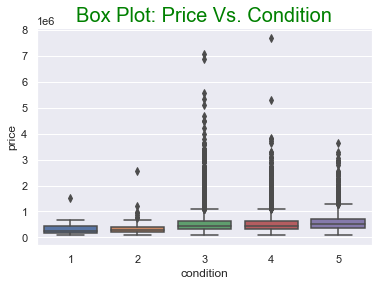

In [307]:
# Plot price on different condition

sns.boxplot(x='condition', y='price', data=df_r)
plt.title("Box Plot: Price Vs. Condition", color = 'green', fontsize = 20)

Text(0.5, 1.0, 'Box Plot: Price Vs. Bedrooms')

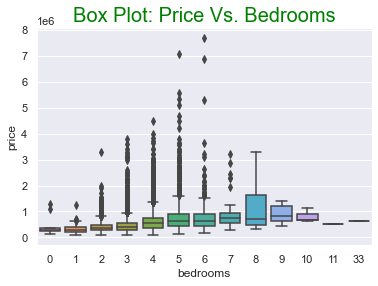

In [308]:
# Plot price on varying bedrooms

sns.boxplot(x='bedrooms', y='price', data=df_r)
plt.title("Box Plot: Price Vs. Bedrooms", color = 'green', fontsize = 20)

**Observation:**

1. The boxplot indicate -
    * Price range varies most for houses with 8 bedrooms

### II.I.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize

* People mostly like houses with the following property -
    * Three bedroom
    * Condition 3
    * Seventh grade
    * 2.5 Bathrooms
    * Without waterfront
    * View 0
* This is actually true as we have observed from the linear regression graph that `with waterfront` price is prety high.

## II.II. Introduction of Classification Data

This dataset [[2]](https://www.kaggle.com/lodetomasi1995/income-classification) contains person's income information with 14 attributes. The dataset have `32561` rows in total. Here is the attribute list along with the data-type.

**Attribute Information:**
 0.   age (int64) 
 1.   workclass (object)
 2.   fnlwgt (int64)
 3.   education (object)
 4.   education-num (int64)
 5.   marital-status (object)
 6.   occupation (object)
 7.   relationship (object)
 8.   race (object)
 9.   sex (object)
 10.  capital-gain (int64)
 11.  capital-loss (int64)
 12.  hours-per-week (int64)
 13.  native-country (object)
 14.  income (object)

### II.II.I. Reading the data

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data from csv datafile; using read_csv method from Pandas library
df_c = pd.read_csv("data/classification/income_evaluation.csv", sep=r'\s*,\s*',
                           header=0, encoding='ascii', engine='python')

# displaying all the columns data of top 10 rows in the jupyter notebook
pd.set_option('max_columns', 28)
df_c.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


### II.II.II. Preprocessing of the data

In [311]:
# get the metadata; getting familiarized with columns and data-types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the "Non-Null Count" column above, we can observe all the rows contain same number of non-null counts. From this data we can sense that there is no null values in this dataset.

To confirm this, let's check it using library function.

In [312]:
# checking columns with null values
df_c.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

But we can observe that a couple of columns contains hypens (`-`). Cleaning up the column names that have `-` in the dataframe.

In [313]:
# clean up column names that have '-' in the dataframe

cols = df_c.columns
new_column_names = []

for col in cols:
    new_col = col.lstrip().rstrip().replace ("-", "_")
    new_column_names.append(new_col)

df_c.columns = new_column_names

df_c.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Now will check the unique values in the target column (i.e. `income`) and replace the values with more meaningfull name (i.e. `Low-income`, `High-income`).

In [314]:
df_c.loc[df_c['income'] == '<=50K', 'income'] = 'Low-income'
df_c.loc[df_c['income'] == '>50K', 'income'] = 'High-income'

df_c.income.unique()

array(['Low-income', 'High-income'], dtype=object)

There is no null values in any particular columns. So we don't need to perform any data pre-processing here.

### II.II.III. Visualization of the data

#### II.II.III.I. Correlation Heatmap

Corelation heatmap is provided bellow. Here I am listing my observations from the correlation heatmap:

1. As `income` is a object type data, we can't retrieve correlation information w.r.t. that. This has been further discussed in section $II.II.V$.

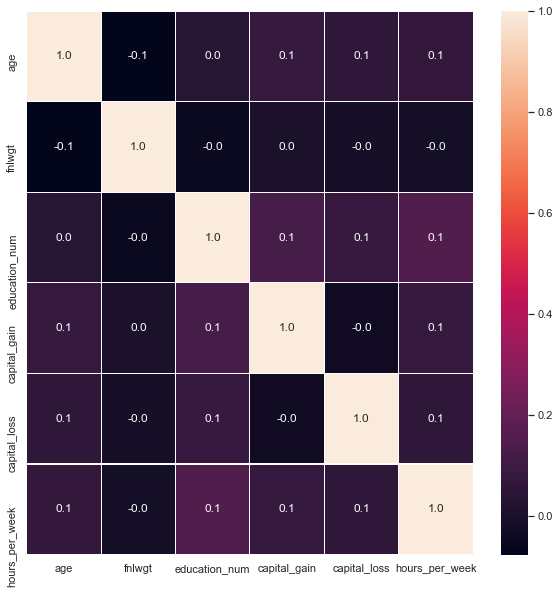

In [315]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

#### II.II.III.II. Pie-chart

In [316]:
eduList = []
eduCount = []
for edu_name, subset in df_c.groupby('education'):
    eduList.append(edu_name)
    eduCount.append(len(subset))
print(eduList)
print(eduCount)

workclassList = []
workclassCount = []
for class_name, subset in df_c.groupby('workclass'):
    workclassList.append(class_name)
    workclassCount.append(len(subset))
print(workclassList)
print(workclassCount)

maritalList = []
maritalCount = []
for marital_name, subset in df_c.groupby('marital_status'):
    maritalList.append(marital_name)
    maritalCount.append(len(subset))
print(maritalList)
print(maritalCount)

occupationList = []
occupationCount = []
for occupation_name, subset in df_c.groupby('occupation'):
    occupationList.append(occupation_name)
    occupationCount.append(len(subset))
print(occupationList)
print(occupationCount)

relationshipList = []
relationshipCount = []
for relationship_name, subset in df_c.groupby('relationship'):
    relationshipList.append(relationship_name)
    relationshipCount.append(len(subset))
print(relationshipList)
print(relationshipCount)

raceList = []
raceCount = []
for race_name, subset in df_c.groupby('race'):
    raceList.append(race_name)
    raceCount.append(len(subset))
print(raceList)
print(raceCount)

sexList = []
sexCount = []
for sex_name, subset in df_c.groupby('sex'):
    sexList.append(sex_name)
    sexCount.append(len(subset))
print(sexList)
print(sexCount)

countryList = []
countryCount = []
for country_name, subset in df_c.groupby('native_country'):
    countryList.append(country_name)
    countryCount.append(len(subset))
print(countryList)
print(countryCount)

incomeList = []
incomeCount = []
for income_name, subset in df_c.groupby('income'):
    incomeList.append(income_name)
    incomeCount.append(len(subset))
print(incomeList)
print(incomeCount)

['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
[933, 1175, 433, 168, 333, 646, 514, 1067, 1382, 5355, 413, 10501, 1723, 51, 576, 7291]
['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
[1836, 960, 2093, 7, 22696, 1116, 2541, 1298, 14]
['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
[4443, 23, 14976, 418, 10683, 1025, 993]
['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
[1843, 3770, 9, 4099, 4066, 994, 1370, 2002, 3295, 149, 4140, 649, 3650, 928, 1597]
['Husband', 'Not-in-family', 'Other-relative', 'Own-ch

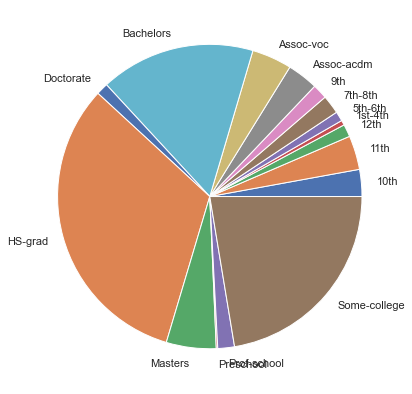

In [317]:
plt.figure(figsize = (7, 7))
plt.pie(eduCount, labels = eduList)
plt.show()

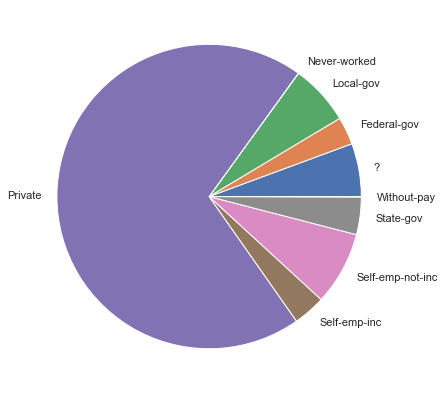

In [318]:
plt.figure(figsize = (7, 7))
plt.pie(workclassCount, labels = workclassList)
plt.show()

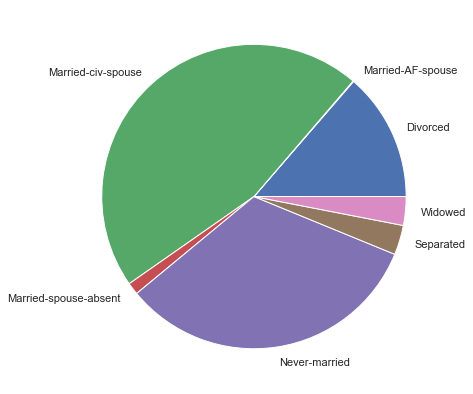

In [319]:
plt.figure(figsize = (7, 7))
plt.pie(maritalCount, labels = maritalList)
plt.show()

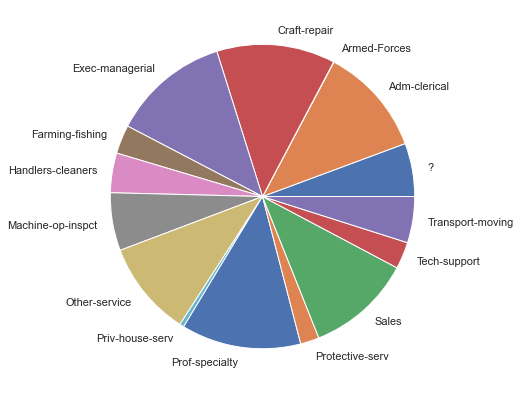

In [320]:
plt.figure(figsize = (7, 7))
plt.pie(occupationCount, labels = occupationList)
plt.show()

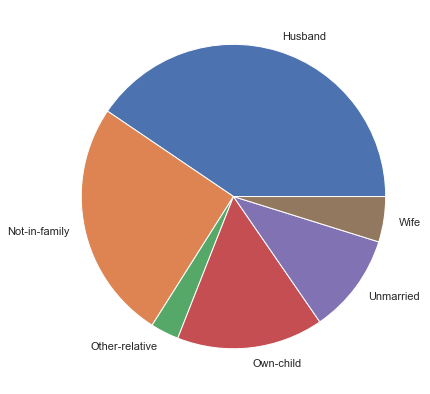

In [321]:
plt.figure(figsize = (7, 7))
plt.pie(relationshipCount, labels = relationshipList)
plt.show()

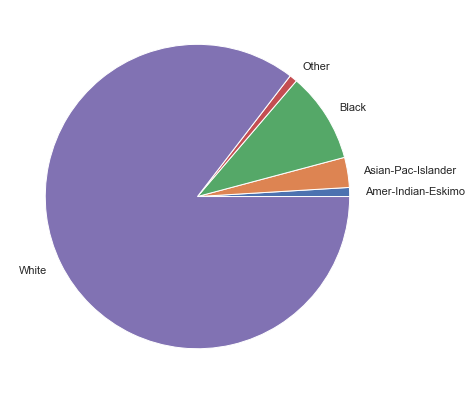

In [322]:
plt.figure(figsize = (7, 7))
plt.pie(raceCount, labels = raceList)
plt.show()

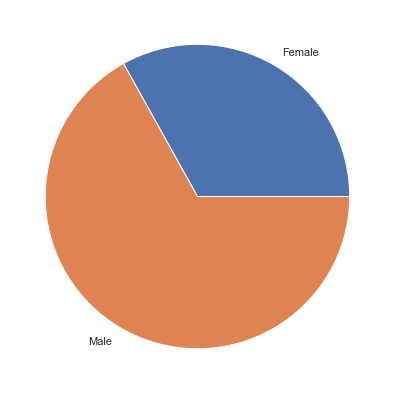

In [323]:
plt.figure(figsize = (7, 7))
plt.pie(sexCount, labels = sexList)
plt.show()

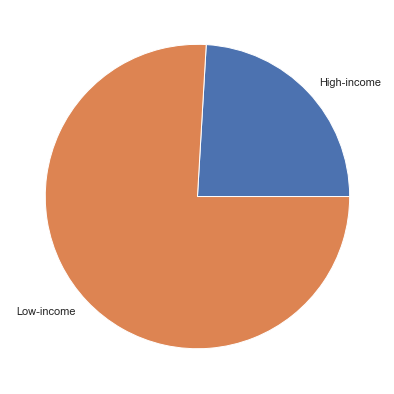

In [324]:
plt.figure(figsize = (7, 7))
plt.pie(incomeCount, labels = incomeList)
plt.show()

**Observation:**
1. The `pie-charts` compare parts of different attributes to the whole. It helps picturing which types of data exist more in the dataset and can influence making any decision.
2. From the pie-chart we can observe the largest employee comes from-
    * Gender: `Male`
    * Race: `White`
    * Relationship: `Husband`
    * Marital-status: `Married-civ-spouse`
    * Education: `HS-grad`
3. We can also observe that, most of the people work on the `private` sector.
4. Only 22% people earn high.

#### II.II.III.III. Bar Graph

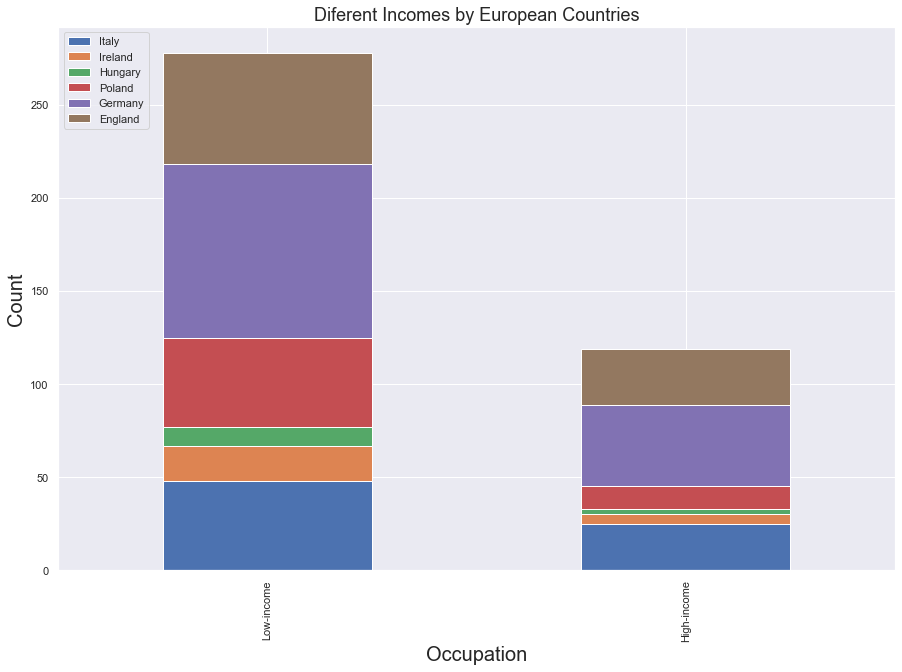

In [325]:
it = df_c[df_c.native_country == 'Italy']['income'].value_counts(sort=False)
ir = df_c[df_c.native_country == 'Ireland']['income'].value_counts(sort=False)
h = df_c[df_c.native_country == 'Hungary']['income'].value_counts(sort=False)
po = df_c[df_c.native_country == 'Poland']['income'].value_counts(sort=False)
g = df_c[df_c.native_country == 'Germany']['income'].value_counts(sort=False)
e = df_c[df_c.native_country == 'England']['income'].value_counts(sort=False)

pd.DataFrame({'Italy': it, 'Ireland': ir, 'Hungary': h, 'Poland': po, 'Germany': g, 'England': e}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by European Countries", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. From this chart we can observe that `Germany` have the highest employed among the `European` countries.

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='income', ylabel='count'>

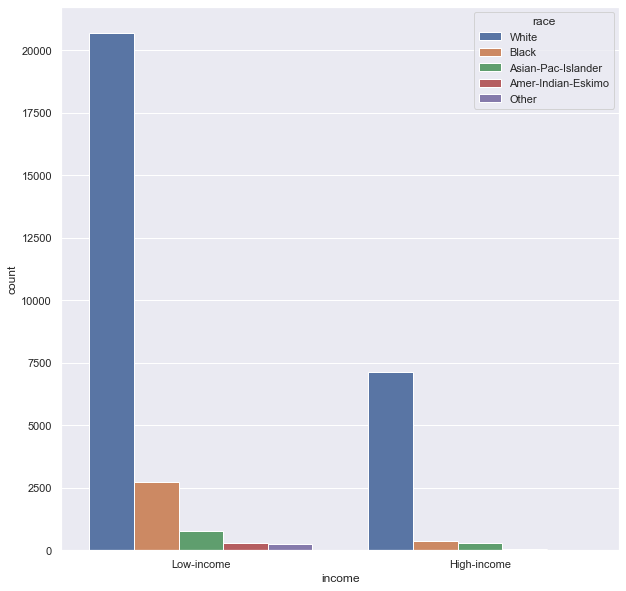

In [326]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df_c['income'],hue=df_c['race'])

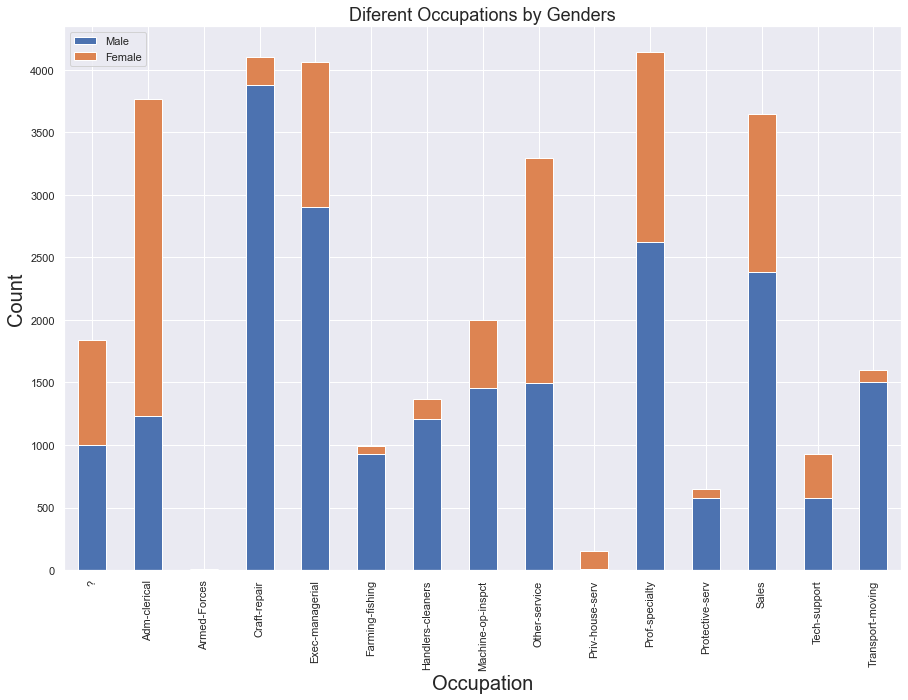

In [327]:
m = df_c[df_c.sex == 'Male']['occupation'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['occupation'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Occupations by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. People from `White` and `Black` race acquire more jobs.
2. More female employee work in `Adm-clerical` and `Priv-house-serv`.
3. There is a `50-50` ratio in the `Other-service`.

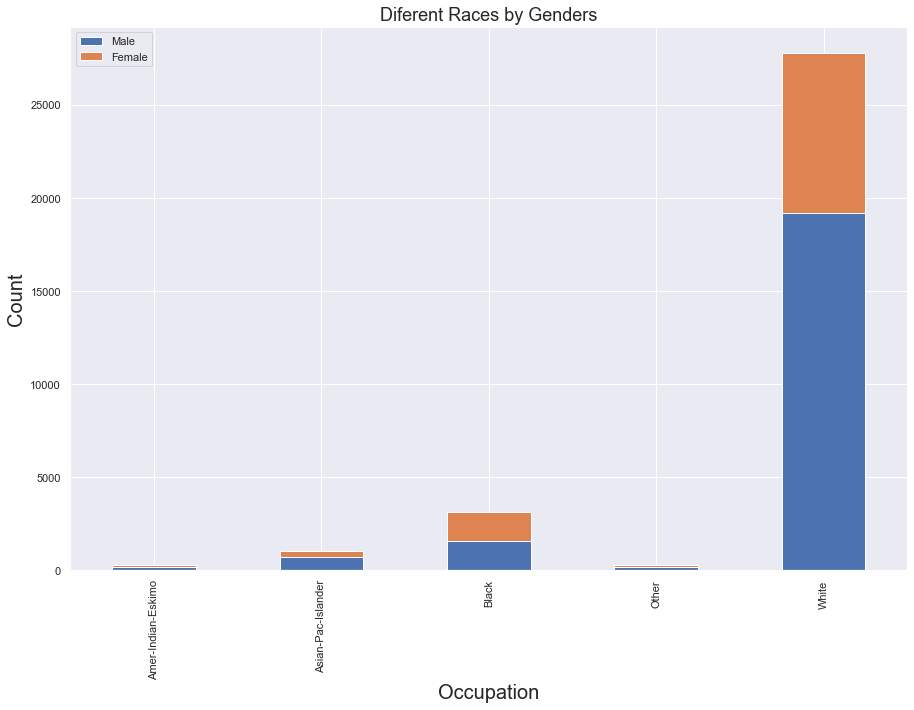

In [329]:
m = df_c[df_c.sex == 'Male']['race'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['race'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Races by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

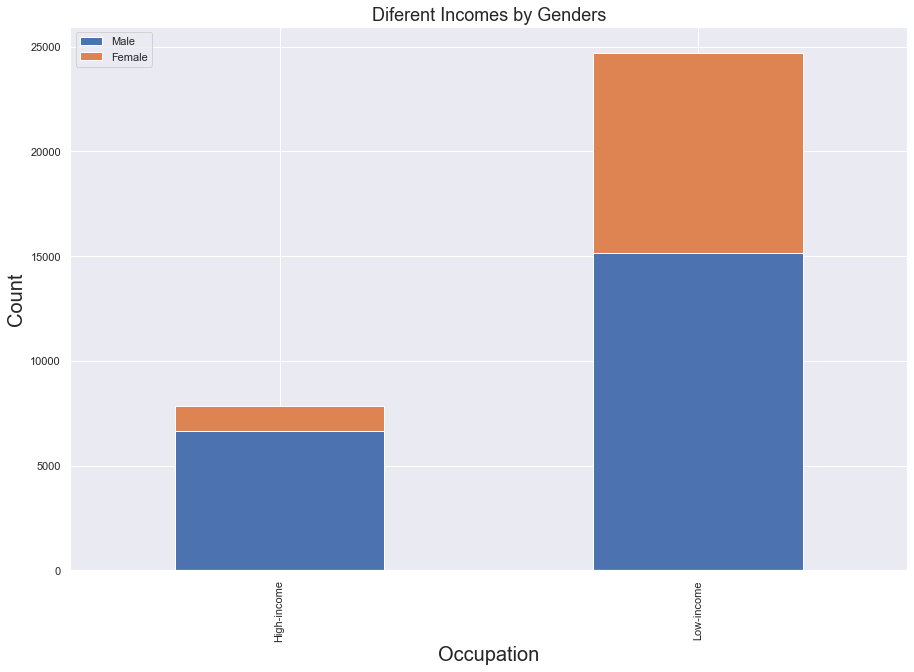

In [330]:
m = df_c[df_c.sex == 'Male']['income'].value_counts(sort=False)
w = df_c[df_c.sex == 'Female']['income'].value_counts(sort=False)
pd.DataFrame({'Male': m, 'Female': w}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("Diferent Incomes by Genders", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

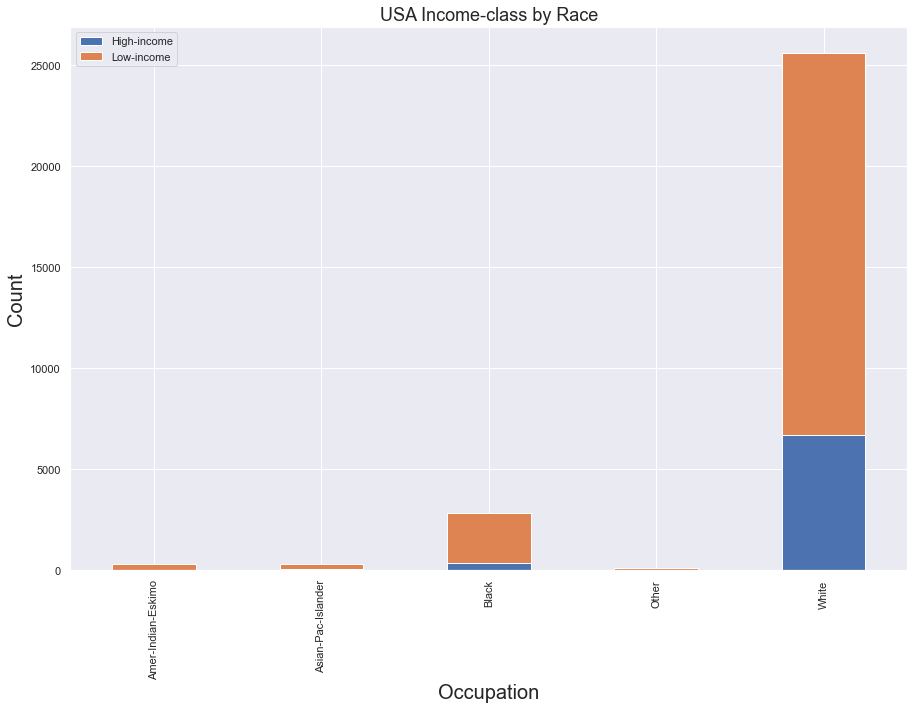

In [331]:
h = df_c[(df_c.income == 'High-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
l = df_c[(df_c.income == 'Low-income') & (df_c['native_country'] == 'United-States')]['race'].value_counts(sort=False)
pd.DataFrame({'High-income': h, 'Low-income': l}).plot.bar(stacked=True)
plt.gcf().set_size_inches(15, 10)
plt.title("USA Income-class by Race", size=18)
plt.legend(loc="upper left")
plt.xlabel('Occupation', size=20)
plt.ylabel('Count', size=20)
plt.show()

**Observation:**
1. There are small number of female employee who earn more.
2. In `USA`, people from `white` race hold more `high-income` jobs.

### II.II.IV. Preliminary observation

We made individual observations on the different plotting above. To summarize-

* We observed `gender` and `race` discrimination.
* There are more jobs in the job-market for medium education level (i.e. high-school graduates).
* There is no clear winner for a specific type of jobs; which is true is comparing to the society.

### II.II.V. Preprocessing for Classification

As I am planning to run classification algorithms on this dataset to classify higher and lower income group, I made further data processing to convert the text data to numeric one. This is a prerequisite for the algorithms I implemented and described later.

In [332]:
encoding_dict = {"workclass": {'State-gov':1, 'Self-emp-not-inc':2, 'Private':3, 'Federal-gov':4,
                               'Local-gov':5, '?':6, 'Self-emp-inc':7, 'Without-pay':8, 'Never-worked':9},
                 "education": {'Bachelors':1, 'HS-grad':2, '11th':3, 'Masters':4, '9th':5, 'Some-college':6,
                               'Assoc-acdm':7, 'Assoc-voc':8, '7th-8th':9, 'Doctorate':10, 'Prof-school':11,
                               '5th-6th':12, '10th':13, '1st-4th':14, 'Preschool':15, '12th':16},
                 "marital_status": {'Never-married':1, 'Married-civ-spouse':2, 'Divorced':3,
                                    'Married-spouse-absent':4, 'Separated':5, 'Married-AF-spouse':6, 'Widowed':7},
                 "occupation": {'Adm-clerical':1, 'Exec-managerial':2, 'Handlers-cleaners':3,
                                'Prof-specialty':4, 'Other-service':5, 'Sales':6, 'Craft-repair':7,
                                'Transport-moving':8, 'Farming-fishing':9, 'Machine-op-inspct':10,
                                'Tech-support':11, '?':12, 'Protective-serv':13, 'Armed-Forces':14,
                                'Priv-house-serv':15},
                 "relationship": {'Not-in-family':1, 'Husband':2, 'Wife':3, 'Own-child':4, 'Unmarried':5,
                                  'Other-relative':6},
                 "race": {'White':1, 'Black':2, 'Asian-Pac-Islander':3, 'Amer-Indian-Eskimo':4, 'Other':5},
                 "sex": {'Male':-1, 'Female':1},
                 "native_country": {'United-States':1, 'Cuba':2, 'Jamaica':3, 'India':4, '?':5, 'Mexico':6,
                                    'South':7, 'Puerto-Rico':8, 'Honduras':9, 'England':10, 'Canada':11,
                                    'Germany':12, 'Iran':13, 'Philippines':14, 'Italy':15, 'Poland':16,
                                    'Columbia':17, 'Cambodia':18, 'Thailand':19, 'Ecuador':20, 'Laos':21,
                                    'Taiwan':22, 'Haiti':23, 'Portugal':24, 'Dominican-Republic':25,
                                    'El-Salvador':26, 'France':27, 'Guatemala':28, 'China':29, 'Japan':30,
                                    'Yugoslavia':31, 'Peru':32, 'Outlying-US(Guam-USVI-etc)':33, 'Scotland':34,
                                    'Trinadad&Tobago':35, 'Greece':36, 'Nicaragua':37, 'Vietnam':38, 'Hong':39,
                                    'Ireland':40, 'Hungary':41, 'Holand-Netherlands':42},
                 "income": {'Low-income':-1, 'High-income':1},
                }

df_c.replace(encoding_dict, inplace = True)

# observe pairwise correlation of columns using library function
df_c.corr()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,1.000000,0.082380,-0.076646,0.007767,0.036527,0.424606,0.017201,-0.217767,-0.040000,-0.088832,0.077674,0.057775,0.068756,-0.011572,0.234037
workclass,0.082380,1.000000,-0.006314,0.011666,0.011343,0.035949,0.217072,0.015524,0.009359,0.019347,0.041172,0.012510,-0.028084,-0.010246,0.047203
fnlwgt,-0.076646,-0.006314,1.000000,0.024188,-0.043195,-0.023527,0.007892,0.017142,0.000500,-0.026858,0.000432,-0.010252,-0.018768,0.035910,-0.009463
education,0.007767,0.011666,0.024188,1.000000,-0.279614,0.008507,0.074961,0.044319,0.029638,0.000550,0.024154,-0.003192,-0.050025,0.067619,-0.046218
education_num,0.036527,0.011343,-0.043195,-0.279614,1.000000,-0.065996,-0.242997,-0.141075,-0.039760,-0.012280,0.122630,0.079923,0.148123,-0.066044,0.335154
marital_status,0.424606,0.035949,-0.023527,0.008507,-0.065996,1.000000,0.006524,0.029083,0.012722,0.181870,0.004460,0.006833,-0.000277,0.001912,0.002644
occupation,0.017201,0.217072,0.007892,0.074961,-0.242997,0.006524,1.000000,-0.016150,0.016586,-0.147779,-0.045060,-0.023963,-0.045240,0.019578,-0.104691
relationship,-0.217767,0.015524,0.017142,0.044319,-0.141075,0.029083,-0.016150,1.000000,0.096808,0.273414,-0.044045,-0.050498,-0.184873,0.042444,-0.171294
race,-0.040000,0.009359,0.000500,0.029638,-0.039760,0.012722,0.016586,0.096808,1.000000,0.067840,-0.007991,-0.017190,-0.033115,0.241650,-0.067713
sex,-0.088832,0.019347,-0.026858,0.000550,-0.012280,0.181870,-0.147779,0.273414,0.067840,1.000000,-0.048480,-0.045567,-0.229309,0.005977,-0.215980


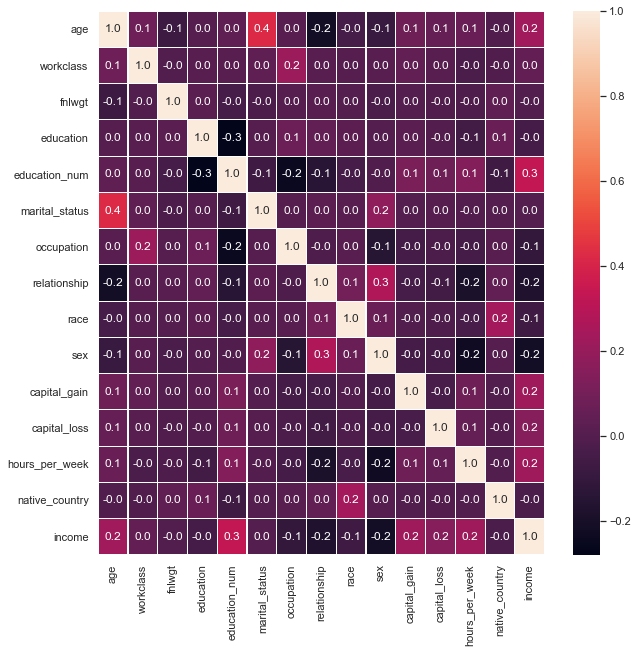

In [333]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df_c.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# III. Methods

## III.I 5-fold Cross Validation

Agenda:
- Explain and use 5-fold cross validation to find a good neural network parameters including the structure to report the CV accuracies. (&check;)

k-Fold Cross Validation [[3]](#) is a very powerful technique to check how well a model performs when we apply it on an independent data. It is often used to flag problems caused by overfitting and resampling [[4]](#). In this assignment, I explored cross validation only for finding the best hidden layer units. Although cross valisation used in verious useful purposes, it also brings an additional data processing load and time.

Here, Figure-2 depicts the k-fold cross validation. It involves randomly dividing the dataset into k-groups of equal size, take one of the folds as the validating set in each step and calculate the accuracy.

<img src="https://i.imgur.com/hq45Jfq.png" width=700/>
<center>Figure 2. Visualization of Cross Validation (kaggle.com)</center>

The figure below depics the neural network model that I have used in this assignment. Here I used one hidden layer and the best hidden units in this layer has been measured by cross validation (from a set of possible hidden units).

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nn.png" width=500/>
<center>Figure 3. Visualization of Neural Network Model by Lee et al.</center>

There are many variants of k-Fold Cross Validation [6](). In my implementation, I first split the whole dataset into two parts (i.e. `Training Dataset` and `Test Dataset`). Then I further splitted the training dataset in equal $K$ folds. In each iteration, I used $(K-1)$ folds in training and the remaining fold for validating. From this iteration, I get the best parameter (in this assignment, the number of hidden units in the hidden layer) by passing the training folds to train the model and afterward validating the model.

### III.I.I 5-fold Cross Validation: Explanation of Codes

I prepared a extendable class `AlgoCVWrapper` which I have further used to do the experimentation on regression and classification through neural network. This class has two implemented methods. The `__init__` method will initialize all the class attributes as $None$. `train_test_split` method is responsible to split a dataset into a train and test set. The split is done on the training data ratio passed as a parameter (the default value is $0.90$). `cross_validation_split` further split the training data into K-folds, where the number of folds is passed as the parameter (default value set to $5$) in this method.

The abstract method `run` will be implemented by the class who will extend this. In the run method, I will write the remaining code where K-folded data will be applied for training and validating the neural network models.

In [224]:
from random import seed
from random import randrange
from abc import ABC, abstractmethod
from copy import deepcopy as copy

class AlgoCVWrapper:
    """
        Abstract class for doing experiment through Cross Validation
        
        Attributes
        ==========
        Xtrain            List of all the training feature data
        Ttrain            List of all the training target data
        Xtest             List of test feature data
        Ttest             List of test target data
        Xtrain_split      List of splitted training feature data
        Ttrain_split      List of splitted training target data
    """

    def __init__(self):
        """
            initialized all the attributes as None
        """
        seed(1)
        self.Xtrain = None
        self.Ttrain = None
        self.Xtest = None
        self.Ttest = None
        self.Xtrain_split = None
        self.Ttrain_split = None

    # Split a dataset into a train and test set
    def train_test_split(self, Xdataset, Tdataset, split=0.90):
        self.Xtrain = list()
        self.Ttrain = list()
        train_size = split * len(Xdataset)
        print("train size: {}, test size: {}".format(train_size, len(Xdataset)-train_size))
        self.Xtest = Xdataset
        self.Ttest = Tdataset
        while len(self.Xtrain) < train_size:
            index = randrange(len(self.Xtest))
            self.Xtrain.append(self.Xtest.pop(index))
            self.Ttrain.append(self.Ttest.pop(index))
    
    # Split a dataset into k folds
    def cross_validation_split(self, Xdataset, Tdataset, folds=5):
        self.train_test_split(Xdataset, Tdataset)
        
        self.Xtrain_split = list()
        self.Ttrain_split = list()
        
        tmp_Xtrain = copy(self.Xtrain)
        tmp_Ttrain = copy(self.Ttrain)

        fold_size = int(len(tmp_Xtrain) / folds)
        print("fold size: {}".format(fold_size))
        for i in range(folds):
            Xfold = list()
            Tfold = list()
            while len(Xfold) < fold_size:
                index = randrange(len(tmp_Xtrain))
                Xfold.append(tmp_Xtrain.pop(index))
                Tfold.append(tmp_Ttrain.pop(index))
            self.Xtrain_split.append(Xfold)
            self.Ttrain_split.append(Tfold)

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def run(self, X, T, layers, folds=5):
        """
            run neural network algorithm
            
            parameters
            -----------
            X         List of input data
            T         List of target labels
            layers    layers of Neural Network
        """        
        pass

## III.II Nonlinear Regression

Agenda:
- Summarize the nonlinear regression model. (&check;)
- Use the NeuralNet class for regression to apply to your data. (&check;)
- Explain your codes (not in comment). (&check;)

In programming_assignment-1 we explored a couple of linear regression algorithms where we find a best fitted line to predict the unseen data. It relates two variables ($x$ and $y$) with a straight line.

$$y = mx + b$$

In nonlinear regression, instead of a straight line we can fit curves. So from this simple definition of nonlinear regression we can assume, the observational data are modeled by a function which is a nonlinear combination of the model parameters and depends on one or more independent variables. The goal of the model is to make the Root Mean Square Error (RMSE) as small as possible.

Nonlinear regression is more preferable when there is no linear relationship among data features and we need a complex curve to predict the data.

### III.II.I Nonlinear Regression: Explanation of Codes

As mentioned earlier, I used the provided `NeuralNet` class in solving the nonlinear regression problem. Here I listed all the methods, attributes and parameters of this model:

* **Parameters**
    * **nunits:** List of parameters, representing number of units in each layer. The list requires atleast three entries representing the number of inputs, hidden units, and outputs. We can create more hidden layers by passing more hidden units in this parameter.
* **Attributes**
    * **_nLayers:** The number of hidden unit layers.
    * **rho:** Learning rate, value propotional to number of hidden unit layers.
    * **_W:** Weights.
    * **_weights:** Weights in one dimension (`_W` is referencing `_weight`). It helps in optimizing memory and calculation.
    * **stdX:** Standardization class for data.
    * **stdT:** Standardization class for target.
* **Methods**
    * **set_hunit:** This method updates/initiates weights.
    * **pack:** Horizontally pack multiple weights of each layer into one vector.
    * **forward:** Do forward processing of neural network.
    * **backward:** Do back-propagation of neural network.
    * **train:** Train the neural network. First, standarize the input feature and target set then do the optimization through gradient update.
    * **use:** Traditional machine learning `use` method, appply the trained network for doing prediction on the test data.

### III.II.II Nonlinear Regression: Feature Selection and Data Preparation

First we randomly shuffle the whole dataset and select $20K$ data row for our experiment. This gives us two benifits,

1. Improve the ML model quality
2. Improve the predictive performance

Besides partitioning, feature selection is also very crutial for regression models. In feature selection we actually determine which features are importent predicting the output. As discussed in `section II.I.III.I.`, the most correlated attributes with the target attribute (i.e. `price`) are
1. bathrooms
2. sqft_living
3. view
4. grade
5. sqft_above
6. sqft_living15

So considering this, I have selected the most significant features (I considered the features that have `correlation_val >= 0.5` as the significant features) in the rest of the experiments on nonlinear regression.

As part of sanity checking of the `NeuralNet` model, I build the model with all the randomly selected data. To inform you, it passed the sanity checking. I am now confident about the further experimentation.

In [335]:
# randomly pick 20K data
data_r = df_r.sample(20000)

In [336]:
# constants

# list of significant features
sig_features = ['sqft_living', 'sqft_living15', 'sqft_above', 'view', 'grade', 'bathrooms']

# list of target features
target_features = ['price']

In [337]:
X = data_r[sig_features].copy()
X.shape

(20000, 6)

In [338]:
T = data_r[target_features].copy()
T = T.values.reshape(T.shape[0],1)
T.shape

(20000, 1)

In [339]:
import nn
import grad
%reload_ext autoreload
%autoreload 2

nlr = nn.NeuralNet([6, 64, 1])
nlr.train(X, T)
Y = nlr.use(X)

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))


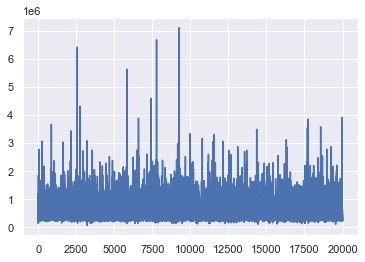

In [340]:
plt.plot(Y)

### III.II.III Nonlinear Regression: Apply Cross Validation

As part of the requirements of this assignment, I further explored the `NeuralNet` model for doing the regression analysis on [[1]](#) with the support of cross validation in finding the best number of hidden unit parameter from a set of choices (i.e. $8$, $16$, $32$, $64$). For this purpose, I prepared a class named `NeuralNetCVWrapper` by extending `AlgoCVWrapper` (has been described previously). Here, I only implemented the `run` method that first call the `cross_validation_split` to generate the splits from the training set.

As we know, to test the performance of nonlinear regession model we have to partition the data into `train-data` and `test-data`. Model training will be done on the `train-data` and then the performance of the model training is done on the `test-data`. As we have total $20K$ data, I considered $90%$ data for training (i.e. $18K$ data record) and the rest for testing (i.e. $2K$ data).

Then I splitted the training data and keep them in list of lists (K-folded). Later, I used each fold as test and returns the accuricies for each fold. Finally, I also added figures showing `Measured Vs. Predicted` results to help visualizing the impacts of cross validation. Nonlinear regression uses logarithmic, trigonometric, exponential, and other fitting methods. I used `tanh` in my experiment.

In [256]:
# Nonlinear Regression Class wrapper for CV
class NeuralNetCVWrapper(AlgoCVWrapper):
    """
        NeuralNetCVWrapper class
    """
    def __init__(self):
        AlgoCVWrapper.__init__(self)
        
    # run NeuralNet
    def run(self, X, T, layers, folds=5):
        errors = []
        test_errors = []
        AlgoCVWrapper.cross_validation_split(self, X, T)
        
        # print("Xtrain_split:", self.Xtrain_split)
        # print("Ttrain_split:", self.Ttrain_split)
        # print("Xtest:", self.Xtest)
        # print("Ttest:", self.Ttest)
        
        for i in range(folds):
            residual = []
            parameter = []
            
            ids = list(range(folds))
            ids.pop(i)

            X_train_round = None
            T_train_round = None
        
            # validation data in the current CV round
            X_validate_round = np.array(self.Xtrain_split)[i]
            T_validate_round = np.array(self.Ttrain_split)[i]
            
            # print("X_validate_round:", X_validate_round)
            # print("T_validate_round:", T_validate_round)
            
            # stacking training data in the current CV round
            for j in ids:
                if j == ids[0]:
                    X_train_round = np.array(self.Xtrain_split)[j]
                    T_train_round = np.array(self.Ttrain_split)[j]
                else:
                    X_train_round = np.concatenate((X_train_round, np.array(self.Xtrain_split)[j]), axis=0)
                    T_train_round = np.concatenate((T_train_round, np.array(self.Ttrain_split)[j]), axis=0)
            
            # measuring accurecy of the NeuralNet model in the current CV round
            max_accuracy = 0
            num_features = np.array(X_train_round.shape)[1]
            for neurons in layers:
                nlr = nn.NeuralNet([num_features, neurons, 1])
                nlr.train(X_train_round, T_train_round)
                T_nlr = nlr.use(X_validate_round)
                accuracy = 100 - np.mean(np.abs(T_validate_round - T_nlr)) % 100
                
                if accuracy > max_accuracy:
                    max_accuracy = accuracy
                
                residual.append(accuracy)
                parameter.append(neurons)
            
            best_param_idx = residual.index(max_accuracy)
            best_param = parameter[best_param_idx]
            errors.append([best_param, max_accuracy])
            print("{}-th iteration done! Error: {}".format((i + 1), errors))
            nlr = nn.NeuralNet([num_features, best_param, 1])
            nlr.train(self.Xtrain, self.Ttrain)
            T_nlr = nlr.use(self.Xtest)
            test_err = 100 - np.mean(np.abs(self.Ttest - T_nlr)) % 100
            test_errors.append([best_param, test_err])
            
            # plotting the result in for the current CV round
            fig, ax = plt.subplots()
            ax.scatter(self.Ttest, T_nlr, edgecolors=(0,0,0))
            ax.plot([min(self.Ttest), max(self.Ttest)], [T_nlr.min(), T_nlr.max()], 'k--', lw=4)
            ax.set_xlabel('Measured')
            ax.set_ylabel('Predicted')
            plt.show()

        return test_errors

### III.II.IV Nonlinear Regression: Experimentation using CV

In this section, I presented the visualization of cross validation results and calculated the `RMSE` and `accuracy` (on the whole training set) for the best parameter found from the cross validation.

Train Shape Check: (20000, 6) (20000, 1)
train size: 18000.0, test size: 2000.0
fold size: 3600
1-th iteration done! Error: [[64, 94.21889827374252]]


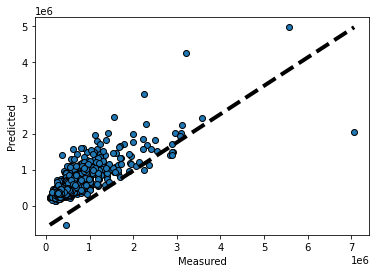

2-th iteration done! Error: [[64, 94.21889827374252], [8, 61.905035337869776]]


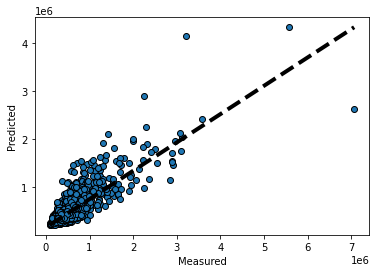

3-th iteration done! Error: [[64, 94.21889827374252], [8, 61.905035337869776], [32, 60.34321760444436]]


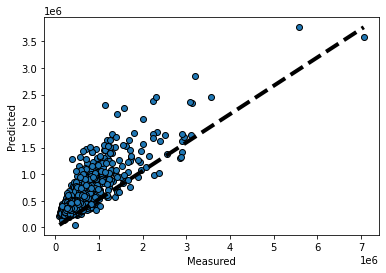

4-th iteration done! Error: [[64, 94.21889827374252], [8, 61.905035337869776], [32, 60.34321760444436], [64, 99.14429423509864]]


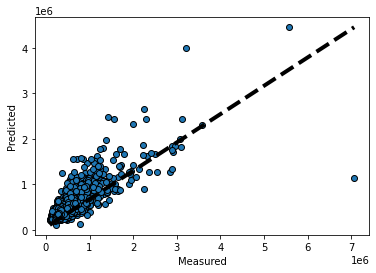

5-th iteration done! Error: [[64, 94.21889827374252], [8, 61.905035337869776], [32, 60.34321760444436], [64, 99.14429423509864], [32, 67.09477114048786]]


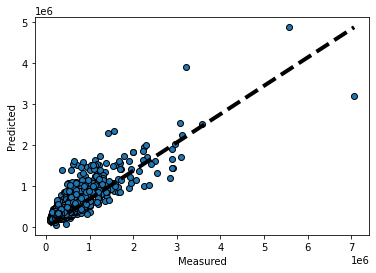

In [257]:
X_train = X
T_train = T
print("Train Shape Check:", X_train.shape, T_train.shape)

nlrcv = NeuralNetCVWrapper()
layers=[8, 16, 32, 64]
test_errors = nlrcv.run(X_train.values.tolist(), T_train.tolist(), layers)

In [259]:
num_features = np.array(X_train.shape)[1]
best_param = max(test_errors, key = lambda x:x[1])

print(best_param)

nlr = nn.NeuralNet([num_features, best_param[0], 1])
nlr.train(nlrcv.Xtrain, nlrcv.Ttrain, ftracep=True)
T_nlr = nlr.use(nlrcv.Xtest)

acc = 100 - np.mean(np.abs(nlrcv.Ttest - T_nlr)) % 100
rmse_error = np.sqrt(np.sum((nlrcv.Ttest - T_nlr)**2))
print("RMS error is :", rmse_error)
print("Accuracy is :", acc)

[32, 70.95079267217079]
RMS error is : 10640739.900322737
Accuracy is : 3.645283231337089


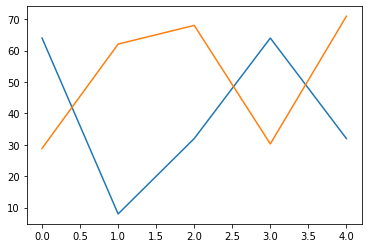

In [260]:
plt.plot(test_errors)

## III.III Nonlinear Logistic Regression

Agenda:
- Summarize the nonlinear logistic regression model. (&check;)
- Finish the following NeuralNetLogReg class. (&check;)
- Check if your codes works well with toy synthetic data. (&check;)
- Apply to your classification data. (&check;)
- Explain your codes (not in comment). (&check;)

Previously, we learned the linear logistic regression that uses the softmax layer for classification along with a linear model. The `softmax` helps doing the softmax transformation. Softmax transformation is a generalization of the logistic function to multiple dimensions. The details of softmax transformation is skiped here as it is outside of the scope of this assignment.

$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

By using this softmax function, we were able to generate the probablistic outputs for all the classes. To handle multi-label classes, we use the indicator target labels for training to update the weights for the linear model. 
Following the derivation, we have achieved the following update rule: 

$$
w_j \leftarrow wv_j + \alpha \sum_{n=1}^{N} \Big( t_{n,j} - g_j(x_n)\Big) x_n.
$$

To update the weights with batch samples, we can convert this update rule in matrix form as follows:

$$
w \leftarrow w + \alpha X^\top \Big(  T - g(X)\Big).
$$

Remember we start from the error function below for the derivation bvefore:

$$
E(w) = - \ln P(T \mid w) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/linearlogreg.png" width=450 />
<center>Figure 4. Softmax function by Lee et al.</center>

Now, we extend this to two layer neural networks. Similar to the derivation of neural network for regression, we can derive the gradient by switching the squuared error with the negative log likelihood function above. The rest of the derivation has been skipped here and can be found in [[5]](#).

<img src="http://webpages.uncc.edu/mlee173/teach/itcs4156online/images/class/nonlinearlogreg.png" width=600 />
<center>Figure 5. Visualization of integrating Neural Network Model for logistic regression (by Lee et al).</center>

**Summary (Regression vs Classification) From Lee et al.**

<table>
    <tr>
        <th></th>
        <th width=45%>Regression</th>
        <th width=45%>Classification</th>
    </tr>
    <tr>
        <td>Forward Pass</td>
        <td>
            $$
            \begin{align}
            Zm &= h(Xlm \cdot Vm) \\
            \\
            Ym & = Zlm \cdot Wm 
            \end{align}
            $$
        </td>
        <td>
            $$
            \begin{align}
            Zm &= h(Xlm \cdot Vm) \\
            \\
            Ym & = Zlm \cdot Wm \\
            Gm & = softmax(Ym)
            \end{align}
            $$
        </td>
    </tr>
    <tr>
        <td>Backward Pass</td>
        <td>
            $$
            \begin{align}
            Vm &leftarrow Vm + \alpha_h \frac{1}{N} \frac{1}{K} Xlm^\top \Big( (Tm - Ym) Wm^\top \odot (1 - Zm^2) \Big) \\
            Wm &leftarrow Wm + \alpha_o \frac{1}{N} \frac{1}{K} Zlm^\top \Big( Tm - Ym \Big) 
            \end{align}
            $$
        </td>
        <td>
            $$
            \begin{align}
            Vm &\leftarrow Vm + \alpha_h Xlm^\top \Big( (Tm - Gm) Wm^\top \odot (1 - Zm^2) \Big)\\
            Wm &\leftarrow Wm + \alpha_o Zlm^\top \Big(  Tm - Gm\Big) 
            \end{align}
            $$
        </td>
    </tr>
    <tr>
        <td></td>
        <td></td>
        <td>Note: Here $Tm$ is a matrix with indicator variable outputs, <br/>and $Gm$ is the output matrix after the softmax layer.
        </td>
    </tr>
</table> 

### III.III.I Nonlinear Logistic Regression: Explanation of Codes

As mentioned earlier, I extend `NeuralNet` model to integrate Neural Network Model for logistic regression. The `NeuralNet` class consists of the major necessary functions that we need to perform nonlinear logistic regression. The additional methods and changes to the existing methods has been listed in the `NeuralNetLogReg` class.

Here, I have added one method named `softmax`. The purpose of this method has been discussed earlier. In the forward pass for logistic regression, we call the `softmax` method with the output of the `froward` method of `NeuralNet`. Another noticible change is, I updated the error function that now calculates the error by the log function. To avoid the undefined error of `log(0)`, I added a small possible value (i.e. `epsilon`) to $Y$.

Further, I updated the `use` method that requires preprocessing of the test sets. It then applies the trained network to predict the data for the test set.

In [97]:
from nn import NeuralNet

class NeuralNetLogReg(NeuralNet):
    """ Nonlinear Logistic Regression
    """
    
    def softmax(self, z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    # if you think, you need additional items to initialize here,
    # add your code for it here
    def __init__(self, nunits):
        NeuralNet.__init__(self, nunits)

    # Looking at the final summary or comparison table in lecture note,
    # add your codes for forward pass for logistic regression
    def forward(self, X):
        t, z = NeuralNet.forward(self, X)
        return (self.softmax(t), z)

    # This is the error function that we want to minimize
    # what was it? take a look at the lecture note to fill in
    def _objectf(self, T, Y, wpenalty):
        epsilon = 1e-12
        Y = np.clip(Y, epsilon, 1. - epsilon)
        N = Y.shape[0]
        ce = -np.sum(np.sum(T * np.log(Y+1e-9)))
        return ce

    # you must reuse the NeuralNet train since you already modified
    # the objective or error function (maybe both), 
    # you do not have many to change here.
    # MAKE SURE convert a vector label T to indicator matrix and 
    # feed that for training
    def train(self, X, T, **params):
        NeuralNet.train(self, X, T)

    # going through forward pass, you will have the probabilities for each label
    # now, you can use argmax to find class labels
    # return both label and probabilities        
    def use(self, X):
        if self.stdX:
            Xs = self.stdX.standardize(X)
        else:
            Xs = X
        classes, prob = self.forward(Xs)
        if self.stdT is not None:
            classes = self.stdT.unstandardize(classes)
        return (np.argmax(classes, 1), prob, classes)

### III.III.II Nonlinear Logistic Regression: Sanity Check
**(Examination of correct implementation of `NeuralNetLogReg` with toy data)**

To confirm the sanity of the `NeuralNetLogReg` class, I have performed the experiments similar to Lee et al. Here is the list of dataset that I considered:

1. Generated Small Data (showing 95% accuracy)
2. Circles Data (showing 50% accuracy)
3. Iris Data (showing 33% accuracy)

#### III.III.II.I Experiment on Generated Data

Xtrain-shape: (100, 2)
Ttrain-shape: (100, 1)


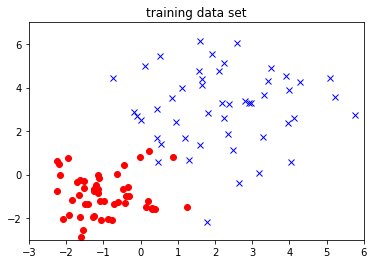

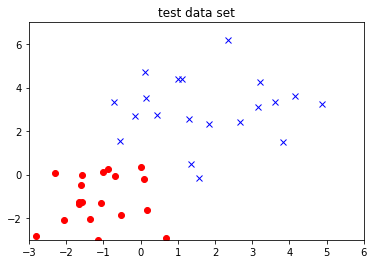

In [115]:
# Data for testing
N1 = 50
N2 = 50
N = N1 + N2
D = 2
K = 2

mu1 = [-1, -1]
cov1 = np.eye(2)

mu2 = [2,3]
cov2 = np.eye(2) * 3

#
#  Train Data
#
C1 = np.random.multivariate_normal(mu1, cov1, N1)
C2 = np.random.multivariate_normal(mu2, cov2, N2)

plt.plot(C1[:, 0], C1[:, 1], 'or')
plt.plot(C2[:, 0], C2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("training data set")

Xtrain = np.vstack((C1, C2))
Ttrain = np.zeros((N, 1))
Ttrain[50:, :] = 1  # labels are zero or one

means, stds = np.mean(Xtrain, 0), np.std(Xtrain, 0)
# normalize inputs
Xtrains = (Xtrain - means) / stds

#
#  Test Data
#
Ct1 = np.random.multivariate_normal(mu1, cov1, 20)
Ct2 = np.random.multivariate_normal(mu2, cov2, 20)

Xtest = np.vstack((Ct1, Ct2))
Ttest = np.zeros((40, 1))
Ttest[20:, :] = 1

# normalize inputs
Xtests = (Xtrain - means) / stds


plt.figure()
plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

plt.xlim([-3, 6])
plt.ylim([-3, 7])
plt.title("test data set")

# print("Xtrain-shape:", Xtrain.shape)
# print("Ttrain-shape:", Ttrain.shape)

# print(Xtrain)
# print(Ttrain)

In [99]:
# Apply Nonlinear Logistic Regression

clsf = NeuralNetLogReg([2, 4, 2])
clsf.train(Xtrain, Ttrain)
classes, Y, Z = clsf.use(Xtest)

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [100]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [101]:
Y

[array([[-0.8721475 , -0.89271588],
        [-0.61584355, -1.45201156],
        [-0.57904395, -0.65386635],
        [-1.32373784, -0.80673348],
        [-1.25758764, -0.81045337],
        [-0.29754005, -1.13880914],
        [-1.86502477, -0.75604285],
        [-0.63574035, -0.67466898],
        [-0.31941483, -1.17654234],
        [-1.34608882, -1.34532014],
        [-1.2040771 , -0.04612892],
        [-1.68819616, -0.53334893],
        [-1.85561043, -1.04954745],
        [-0.05566419, -0.49455971],
        [ 0.13905082, -0.55344527],
        [-0.64886362, -0.7811441 ],
        [-1.01885109, -0.21680283],
        [-0.75295732, -0.22604615],
        [-0.09789016, -0.62440247],
        [-0.29654259, -0.32639715],
        [ 1.12972811,  0.79858938],
        [ 1.2127302 ,  1.76933019],
        [-0.26599399,  0.92094406],
        [ 0.2430656 ,  1.18542119],
        [ 0.88572668,  0.51167601],
        [ 0.7890574 ,  1.11249006],
        [ 1.148238  , -0.06677213],
        [ 0.27325019,  1.567

Accuracy:  95.0 %


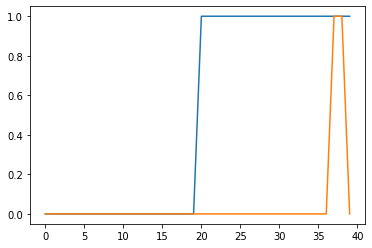

In [103]:
# retrieve labels and plot

plt.plot(Ttest)
plt.plot(classes)

Tl = np.argmax(Ttest, 1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")

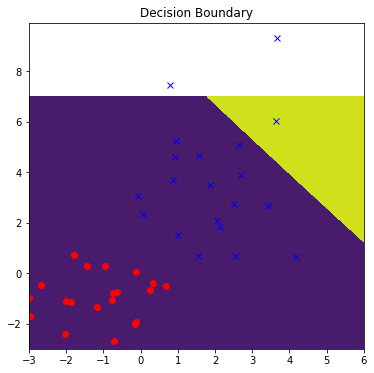

In [105]:
# show me the boundary

x = np.linspace(-3, 6, 1000)
y = np.linspace(-3, 7, 1000)

xs, ys = np.meshgrid(x, y)

X = np.vstack((xs.flat, ys.flat)).T
classes, _, _ = clsf.use(X)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape))
plt.title("Decision Boundary")

plt.plot(Ct1[:, 0], Ct1[:, 1], 'or')
plt.plot(Ct2[:, 0], Ct2[:, 1], 'xb')

#### III.III.II.II Experiment on Circles Data

X-shape: (800, 2)
T-shape: (800, 1)


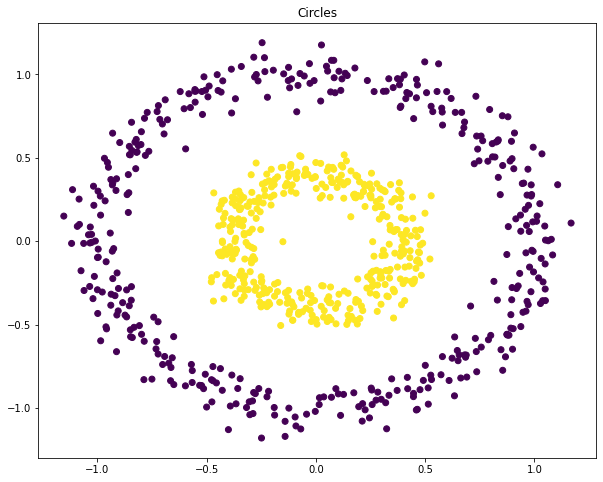

In [120]:
from sklearn.datasets import make_circles

X, T = make_circles(n_samples=800, noise=0.07, factor=0.4)

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=T)
plt.title("Circles")

T = np.reshape(T, (800, 1))

# print(X)
# print(T)

print("X-shape:", X.shape)
print("T-shape:", T.shape)

In [122]:
clsf = NeuralNetLogReg([2, 1, 2])
clsf.train(X, T)

# checking the training error only
classes, Y, Z = clsf.use(X)

Accuracy:  50.0 %


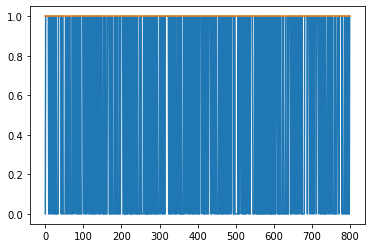

In [123]:
# retrieve labels and plot

plt.plot(T)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(T - classes)) * 100, "%")

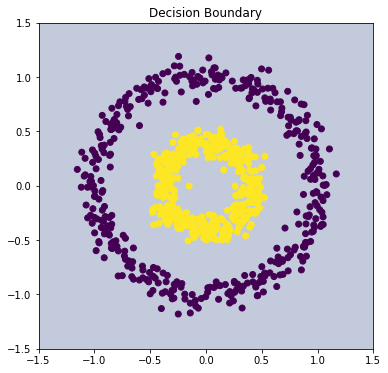

In [125]:
# show me the boundary

x = np.linspace(-1.5, 1.5, 1000)
y = np.linspace(-1.5, 1.5, 1000)

xs, ys = np.meshgrid(x, y)

Xt = np.vstack((xs.flat, ys.flat)).T
classes, _, _ = clsf.use(Xt)
zs = classes.reshape(xs.shape)

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, zs.reshape(xs.shape), alpha=0.3)
plt.title("Decision Boundary")

plt.scatter(X[:, 0], X[:, 1], marker='o', c=T+3)

#### III.III.II.III Experiment on Iris Data

In [126]:
from sklearn.datasets import load_iris

data = load_iris()

In [127]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [128]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [129]:
data.data.shape

(150, 4)

In [132]:
data.target = np.reshape(data.target, (150, 1))

In [133]:
clsf = NeuralNetLogReg([4, 1, 3])
clsf.train(data.data, data.target)

# checking the training error only
classes, Y, Z = clsf.use(data.data)

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Accuracy:  33.33333333333334 %


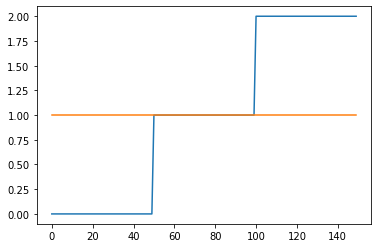

In [134]:
# retrieve labels and plot

plt.plot(data.target)
plt.plot(classes)

print("Accuracy: ", 100 - np.mean(np.abs(data.target - classes)) * 100, "%")

In [135]:
Y

[array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
         -1.31544430e+00],
        [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
         -1.31544430e+00],
        [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
         -1.05217993e+00],
        [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
         -1.18381211e+00],
        [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
         -1.44707648e+00],
        [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
         -1.31544430e+00],
        [-1.26418478e+00,  7.88807586e-01, 

### III.III.III Nonlinear Logistic Regression: Experiment with CV

In this section, I presented the step by step visualization of cross validation results and calculated the `accuracy` in finding the best parameter for Nonlinear Logistic Regression. Finally, I calculated and plotted the result for the best parameter found from the cross validation steps.

After the long class discussion about `feature selection` for classification algorithms, I made educated guess on this regard. From all the feature set, I picked `age`, `education_num`, `capital_gain`, `capital_loss`, and `hours_per_week` features to make the classification on `income`.

In [261]:
# randomly pick 30K data
data_c = df_c.sample(30000)

In [262]:
# list of classification features (educated guess)
classification_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']

# list of target features
target_classification_features = ['income']

In [263]:
# X=data.iloc[:,0:-1]
X_c = data_c[classification_features].copy()
X_c.shape

(30000, 5)

In [264]:
# T=data.iloc[:,-1]
# T= T.values.reshape(T.shape[0],1)
T_c = data_c[target_classification_features].copy()
T_c = T_c.values.reshape(T_c.shape[0],1)
T_c.shape

(30000, 1)

In [281]:
# CV wrapper for Nonlinear Logistic Regression Class
class NeuralNetLogRegCVWrapper(AlgoCVWrapper): 
    """ 
        CV wrapper for Nonlinear Logistic Regression
    """
    def __init__(self):
        AlgoCVWrapper.__init__(self)
        
    # run NeuralNet
    def run(self, X, T, layers, folds=5):
        errors = []
        test_errors = []
        AlgoCVWrapper.cross_validation_split(self, X, T)
        
        # print("Xtrain_split:", self.Xtrain_split)
        # print("Ttrain_split:", self.Ttrain_split)
        # print("Xtest:", self.Xtest)
        # print("Ttest:", self.Ttest)
        
        for i in range(folds):
            residual = []
            parameter = []
            
            ids = list(range(folds))
            ids.pop(i)

            X_train_round = None
            T_train_round = None
        
            X_validate_round = np.array(self.Xtrain_split)[i]
            T_validate_round = np.array(self.Ttrain_split)[i]
            
            for j in ids:
                if j == ids[0]:
                    X_train_round = np.array(self.Xtrain_split)[j]
                    T_train_round = np.array(self.Ttrain_split)[j]
                else:
                    X_train_round = np.concatenate((X_train_round, np.array(self.Xtrain_split)[j]), axis=0)
                    T_train_round = np.concatenate((T_train_round, np.array(self.Ttrain_split)[j]), axis=0)
            
            # print("X_train_round shape:", X_train_round.shape)
            # print("X_validate_round shape:", X_validate_round.shape)
            
            # print("T_train_round shape:", T_train_round.shape)
            # print("T_validate_round shape:", T_validate_round.shape)
            
            max_accuracy = 0
            num_features = np.array(X_train_round.shape)[1]
            for neurons in layers:
                clsf = NeuralNetLogReg([num_features, neurons, 2])
                clsf.train(X_train_round, T_train_round)
                classes, Y, Z = clsf.use(X_validate_round)
                Tl = np.argmax(T_validate_round, 1)
                accuracy = 100 - np.mean(np.abs(Tl - classes)) * 100
                
                if accuracy > max_accuracy:
                    max_accuracy = accuracy 
                
                residual.append(accuracy)
                parameter.append(neurons)
            
            best_param_idx = residual.index(max_accuracy)
            best_param = parameter[best_param_idx]
            errors.append([best_param, max_accuracy])
            print("{}-th iteration done! Error: {}".format((i + 1), errors))
            
            clsf = NeuralNetLogReg([num_features, best_param, 2])
            clsf.train(self.Xtrain, self.Ttrain)
            classes, Y, Z = clsf.use(self.Xtest)
            test_err = 100 - np.mean(np.abs(self.Ttest - classes)) % 100
            test_errors.append([best_param, test_err])
            
            plt.plot(self.Ttest)
            plt.plot(classes)
            Tl = np.argmax(self.Ttest, 1)
            print("Accuracy: ", 100 - np.mean(np.abs(Tl - classes)) * 100, "%")
            plt.show()

        return test_errors

Train Shape Check: (30000, 5) (30000, 1)
train size: 27000.0, test size: 3000.0
fold size: 5400


/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


1-th iteration done! Error: [[32, 100.0]]
Accuracy:  2.6000000000000085 %


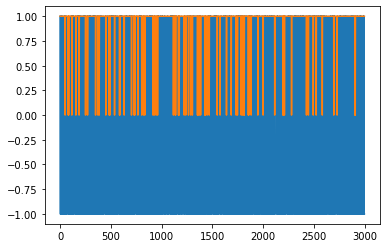

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


2-th iteration done! Error: [[32, 100.0], [16, 100.0]]
Accuracy:  2.1333333333333258 %


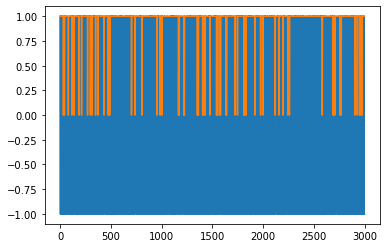

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


3-th iteration done! Error: [[32, 100.0], [16, 100.0], [16, 100.0]]
Accuracy:  80.3 %


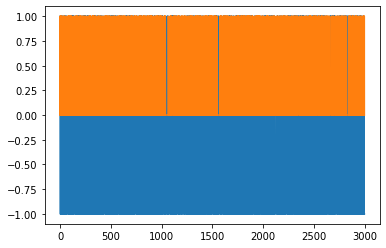

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


4-th iteration done! Error: [[32, 100.0], [16, 100.0], [16, 100.0], [64, 100.0]]
Accuracy:  84.5 %


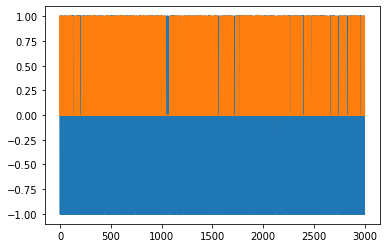

/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


5-th iteration done! Error: [[32, 100.0], [16, 100.0], [16, 100.0], [64, 100.0], [64, 100.0]]
Accuracy:  100.0 %


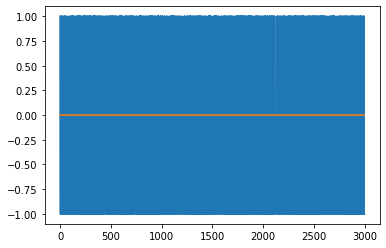

In [288]:
# test data
# X_train_c = X_c[:50]
# T_train_c = T_c[:50]

X_train_c = X_c
T_train_c = T_c
print("Train Shape Check:", X_train_c.shape, T_train_c.shape)

clsfcv = NeuralNetLogRegCVWrapper()
layers = [8, 16, 32, 64]
test_errors_c = clsfcv.run(X_train_c.values.tolist(), T_train_c.tolist(), layers)

In [289]:
num_features_c = np.array(X_train_c.shape)[1]
best_param_c = max(test_errors_c, key = lambda x:x[1])

print(best_param_c)

clsf = NeuralNetLogReg([num_features_c, best_param_c[0], 2])
clsf.train(clsfcv.Xtrain, clsfcv.Ttrain, ftracep=True)
T_clsf, _, _ = clsf.use(clsfcv.Xtest)

[64, 99.0]


/Users/aislam6/workspace/projects/uncc/Fall-2020-ITCS-8156-MachineLearning/programming_assignments/3_Neural-Networks/nn.py:113: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return np.hstack(map(np.ravel, w))
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


Accuracy:  95.46666666666667 %


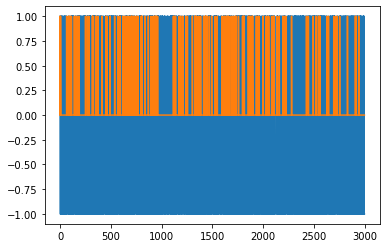

In [290]:
# retrieve labels and plot

plt.plot(clsfcv.Ttest)
plt.plot(T_clsf)
Tl = np.argmax(clsfcv.Ttest, 1)

print("Accuracy: ", 100 - np.mean(np.abs(Tl - T_clsf)) * 100, "%")
plt.show()

# IV. Results

Agenda:
- Presents the results of comparison of the tested models with CV errors. (&check;)
- Visualize the results (&check;)
- What do you think about the results? (&check;)

In this section I will summarize the outcome from my experimentation.

## IV.I Results: Visualization

In the earlier sections, I plotted the visualization of the cross validation steps and overall performance of the models. 

## IV.II Parameter/network structure choice

The neural network structure that I used in this experiment has been described earlier. In finding the best number of hidden units, I have used selected number of entries (i.e. $8$, $16$, $32$, $64$) as the variable entity in each iteration. The hidden units are one of the most important factors for better performance. I reduced the number of features from the dataset as the cross validation was taking too much time. The discussion about feature selection has been covered in earlier sections.

I used a single hidden layer and run cross validation to find the number of hidden units in this layer. There are other options (i.e. finding number of hidden layers) to be explored here. In both of the problems, I used fixed number of iteration (i.e. $1000$). Changing this could change the overall performance and accuracy of the model. But, it would be too hard to cover all this in a single assignment.

The parameter that gives less error in cross validation has been selected for the training of the whole model. This ultimately helped us in gaining better accuracy. In the regression problem by applying cross validation, I found $32$ gives overall better result. On the other hand, in classification problem, I observed $64$ hidden units gives better performance. From the experiment result I understand the importance of cross validation in the neural network paramter selection.

Comparing to classification, regression gives worst result. This could be due to the correlation of the data. I kept exploring this from the ourside of the scope of this assignment.

## IV.III Prediction Results

From the plotted graphs, we can easily observe that the `RMSE` and `accuracy` in the non-linear regression and non-linear logistic regression changes for different cross validation folds. Graphs plotted after every iteration in the cross validation clearly shows the model learning and performance. Once we get the best hidden units in the regression, we observed the change in predicted values plotting.

The `Nonlinear Regression` tries to learn the weights of the features through forward and backward pass. Plotting indicates that, the classification gives better result comparing to the regression. The probable reason could be the distribution of the data, number of hidden layers, number of hidden units in each hidden layers, learning rate, etc. Exploring this could be a future work of this assignment.

In `Nonlinear Logistic Regression`, I first run the implementation on the toy data which gave me boost for the further experiment. One important observation from these experiments is, the output could be biased as the cross validation may contain majority data from one class as we have chosen data in cross validation folds randomly. This could be further improved by equal distributions classes in each folds. Surprisingly, the classification gives overall better result due to the nature of the data (the classification data visualization has been discussed in section $II.II.III$).

# V. Conclusions

By solving the problems of this assignment, I have able to gain in-depth knowledge about Neural Networks and gain confidence to build Neural Networks from the scratch. Throughout extensive experimentation on regrassion data [[1]](https://www.kaggle.com/harlfoxem/housesalesprediction) and classification data [[2]](https://www.kaggle.com/lodetomasi1995/income-classification) I have able to get insight about the importance of neural networks. Finally I exploted the cross validation technique in finding best features for neural networks.

The assignment is well designed and solving this required both strong theoretical and implementation knowledge. One of the key challenge in this assignment was to understand `NeuralNet` class and thanks to Dr. Minwoo Jake Lee to help us understanding it. There could be other possible implementations of cross validation and I only explored one. I believe covering all the sides is not possible in a single assignment.

The assignment requires adding lots of theoretical writing, which seems very easy but required a good amount of quality time. I would prefer exploring more implementation related questions instead of adding those theoretical writing.

# VI. Reference

1. harlfoxem (2016). House Sales in King County, USA, Version 1. Retrieved September 20, 2020 from https://www.kaggle.com/harlfoxem/housesalesprediction.

2. Lorenzo De Tomasi (2018). Income classification, Prediction task is to determine whether a person makes over 50K a year, Version 1. Retrieved September 22, 2020 from https://www.kaggle.com/lodetomasi1995/income-classification

3. "How to Implement Resampling Methods From Scratch In Python," https://machinelearningmastery.com/implement-resampling-methods-scratch-python/, accessed Nov. 5, 2020.

4. "k-NN, Logistic Regression and k-Fold Cross Validation from Scratch," https://www.kaggle.com/burhanykiyakoglu/k-nn-logistic-regression-k-fold-cv-from-scratch, accessed Nov. 13, 2020.

5. Minwoo Jake Lee. Lecture notes in machine learning, November 2020.

6. "K fold and other cross-validation techniques," https://medium.com/datadriveninvestor/k-fold-and-other-cross-validation-techniques-6c03a2563f1e, accessed Nov. 13, 2020.

# VII. Extra Credit

Now you are testing various **activation functions** in this section. Use the best neural network structure and explore 3 different activation functions of your choice (one should be *tanh* that you used in the previous sections). 
You should use cross validation to discover the best model (with activation function). 


One extra credit is assigned when you finish the work completely. 

<font color="red"> SKIPPED!!! </font>

# How to start?

* Download **a3.tgz** from Canvas.
* Unzip the python files to current working directory.
* Import the necessary classes or functions including NeuralNet.

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
10 | Data | 
 | 2| Includes description of your data
 | 3| Plots to visualize data 
 | 5| Reading and analyzing the plots 
40 | Methods | 
 | 10| Summary of CV & correctness of implementation
 | 5| Summary of nonlinear regression 
 | 5| Explanation of codes
 | 5| Summary of nonlinear logistic regression 
 | 5| Explanation of codes
 |10| Examination of correct implementation (NonlinearLogReg) with toy data.
40 | Results | Your Data
| 10| Presentaion of CV results
| 10| Discussions about parameter/network structure choice 
| 10| plots for results
| 10| Discussion about the prediction results. Try to analyze what nonlinear regression model learned. 
5 | Conclusions 
